# 1. Масштабирование

In [84]:
from sklearn import preprocessing
import csv
import pandas as pd
import numpy as np

In [85]:
data = pd.read_csv("flag.data")
data

,Name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


In [86]:
dataset_columns = [
    "landmass", "zone", "area", "population", "language", "religion", "bars", 
    "stripes", "colours", "red", "green", "blue", "gold", "white", "black", "orange", 
    "circles", "crosses", "saltires", "quarters", "sunstars", 
    "crescent", "triangle", "icon", "animate", "text"
]
category_data_columns = [
    "mainhue", "topleft", "botright"
]

dataset = data[dataset_columns]

category_data = data[category_data_columns]

In [87]:
# Кодирование категориальных признаков
enc = preprocessing.OneHotEncoder()
enc.fit(category_data)

category_data = enc.transform(category_data).toarray().tolist()
category_data = pd.DataFrame(category_data)

dataset = pd.concat([dataset, category_data], axis=1, join='inner')

### 1.1 Standard Scaler

In [89]:
scaler = preprocessing.StandardScaler().fit(dataset)

dataset_standard = scaler.transform(dataset)
dataset_standard

array([[ 0.92177276, -0.92830282, -0.02403629, ..., -0.07198158,
        -0.74296702, -0.3099116 ],
       [-0.36937464, -0.92830282, -0.30990555, ..., -0.07198158,
         1.34595476, -0.3099116 ],
       [ 0.27619906, -0.92830282,  0.77953804, ..., -0.07198158,
        -0.74296702,  3.22672662],
       ...,
       [ 0.27619906, -0.16195921,  0.09465256, ..., -0.07198158,
        -0.74296702, -0.3099116 ],
       [ 0.27619906, -0.16195921,  0.02445526, ..., -0.07198158,
        -0.74296702, -0.3099116 ],
       [ 0.27619906, -0.16195921, -0.14272514, ..., -0.07198158,
        -0.74296702, -0.3099116 ]])

In [90]:
scaler.mean_

array([3.57216495e+00, 2.21134021e+00, 7.00046392e+02, 2.32680412e+01,
       5.34020619e+00, 2.19072165e+00, 4.53608247e-01, 1.55154639e+00,
       3.46391753e+00, 7.88659794e-01, 4.69072165e-01, 5.10309278e-01,
       4.69072165e-01, 7.52577320e-01, 2.68041237e-01, 1.34020619e-01,
       1.70103093e-01, 1.49484536e-01, 9.27835052e-02, 1.49484536e-01,
       1.38659794e+00, 5.67010309e-02, 1.39175258e-01, 2.52577320e-01,
       2.01030928e-01, 8.24742268e-02, 2.57731959e-02, 2.06185567e-01,
       1.03092784e-02, 9.79381443e-02, 1.59793814e-01, 2.06185567e-02,
       3.65979381e-01, 1.13402062e-01, 6.18556701e-02, 2.21649485e-01,
       3.09278351e-02, 1.64948454e-01, 2.06185567e-02, 2.88659794e-01,
       2.11340206e-01, 4.63917526e-02, 2.42268041e-01, 1.03092784e-02,
       4.63917526e-02, 2.06185567e-01, 5.15463918e-03, 3.55670103e-01,
       8.76288660e-02])

In [91]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

dataset_2d = tsne.fit_transform(dataset_standard)

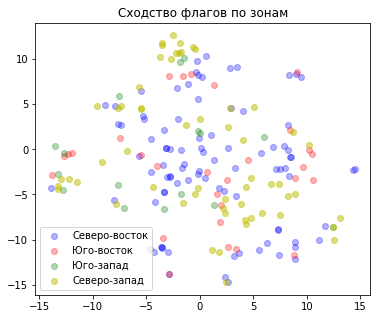

In [93]:
labels = data["zone"].values

plt.figure(figsize=(6,5))
plt.title("Сходство флагов по зонам")
plt.scatter(dataset_2d[labels==1,0], dataset_2d[labels==1,1], c='b', label="Северо-восток", alpha=0.3)
plt.scatter(dataset_2d[labels==2,0], dataset_2d[labels==2,1], c='r', label="Юго-восток", alpha=0.3)
plt.scatter(dataset_2d[labels==3,0], dataset_2d[labels==3,1], c='g', label="Юго-запад", alpha=0.3)
plt.scatter(dataset_2d[labels==4,0], dataset_2d[labels==4,1], c='y', label="Северо-запад", alpha=0.5)
plt.legend()
plt.show()

### 1.2 MinMax Scaler

In [60]:
min_max_scaler = preprocessing.MinMaxScaler()
dataset_minmax = min_max_scaler.fit_transform(dataset.drop(["Name"], axis=1))
dataset_minmax

array([[0.8       , 0.        , 0.02892599, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.        , 0.00129453, ..., 0.        , 1.        ,
        0.        ],
       [0.6       , 0.        , 0.10659763, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.6       , 0.33333333, 0.04039818, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.33333333, 0.03361307, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.33333333, 0.0174538 , ..., 0.        , 0.        ,
        0.        ]])

In [137]:
dataset_minmax.mean()

0.19837044224653796

In [82]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

dataset_2d = tsne.fit_transform(dataset_minmax)

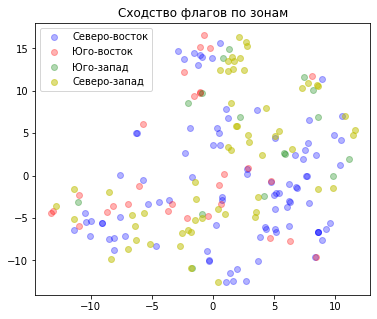

In [78]:
labels = data["zone"].values

plt.figure(figsize=(6,5))
plt.title("Сходство флагов по зонам")
plt.scatter(dataset_2d[labels==1,0], dataset_2d[labels==1,1], c='b', label="Северо-восток", alpha=0.3)
plt.scatter(dataset_2d[labels==2,0], dataset_2d[labels==2,1], c='r', label="Юго-восток", alpha=0.3)
plt.scatter(dataset_2d[labels==3,0], dataset_2d[labels==3,1], c='g', label="Юго-запад", alpha=0.3)
plt.scatter(dataset_2d[labels==4,0], dataset_2d[labels==4,1], c='y', label="Северо-запад", alpha=0.5)
plt.legend()
plt.show()

### 1.3 Robust Scaler

In [61]:
transformer = preprocessing.RobustScaler().fit(dataset.drop(["Name"], axis=1))

dataset_robust = transformer.transform(dataset.drop(["Name"], axis=1))
dataset_robust

array([[ 0.5       , -0.33333333,  1.16170903, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5       , -0.33333333, -0.17739319, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -0.33333333,  4.9259059 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.        ,  1.71768524, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.38885884, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.60573283, ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
dataset_robust.mean()

0.21226197451104847

In [83]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

dataset_2d = tsne.fit_transform(dataset_robust)

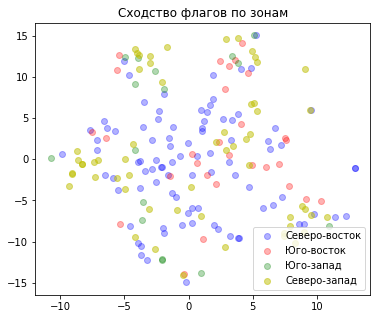

In [80]:
labels = data["zone"].values

plt.figure(figsize=(6,5))
plt.title("Сходство флагов по зонам")
plt.scatter(dataset_2d[labels==1,0], dataset_2d[labels==1,1], c='b', label="Северо-восток", alpha=0.3)
plt.scatter(dataset_2d[labels==2,0], dataset_2d[labels==2,1], c='r', label="Юго-восток", alpha=0.3)
plt.scatter(dataset_2d[labels==3,0], dataset_2d[labels==3,1], c='g', label="Юго-запад", alpha=0.3)
plt.scatter(dataset_2d[labels==4,0], dataset_2d[labels==4,1], c='y', label="Северо-запад", alpha=0.5)
plt.legend()
plt.show()